In [1]:
import numpy as np
import pandas as pd
#import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
df = pd.read_csv('train.csv')
ds_test=pd.read_csv('test.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#In this data set every column contains specific values.. Every column names mean

#battery_power -> Total energy a battery can store in one time measured in mAh

#blue -> Has bluetooth or not

#clock_speed -> speed at which microprocessor executes instructions

#dual_sim -> Has dual sim support or not

#fc -> Front Camera mega pixels

#four_g -> Has 4G or not

#int_memory -> Internal Memory in Gigabytes

#m_dep -> Mobile Depth in cm

#mobile_wt -> Weight of mobile phone

#n_cores -> Number of cores of processor

#pc. -> Primary Camera mega pixels

#px_height -> Pixel Resolution Height

#px_width -> Pixel Resolution Width

#ram -> Random Access Memory in Mega Bytes

#sc_h. -> Screen Height of mobile in cm

#sc_w -> Screen Width of mobile in cm

#talk_time -> longest time that a single battery charge will last when you are

#three_g -> Has 3G or not

#touch_screen -> Has touch screen or not

#wifi -> Has wifi or not

#price_range -> This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# 1. EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
print(df.index)

RangeIndex(start=0, stop=2000, step=1)


In [6]:
df.shape#This dataset contais 21 columns and 2000  rows

(2000, 21)

In [7]:
# print the list of columns in the dataset to find the name of the prediction target
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
#Displaying descriptive statistics of DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [9]:
# Calculating the Missing Values
df.isnull().sum() 
# In this dataset there is no Null value

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
# Column is categorical
# The classes are perfectly balanced.
print(df['price_range'].value_counts())

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


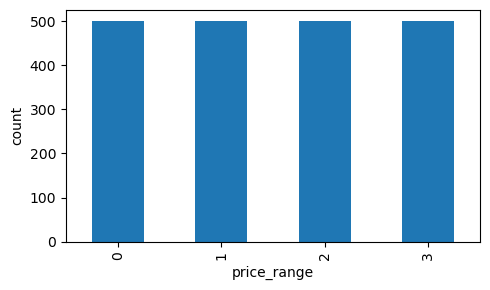

In [29]:
plt.figure(figsize=(5,3))
pd.value = df.groupby(['price_range'])['price_range'].count().plot(kind='bar')
plt.ylabel('count')
plt.xlabel('price_range')
plt.tight_layout()
plt.savefig("price_range.jpg", dpi=300)
plt.show()


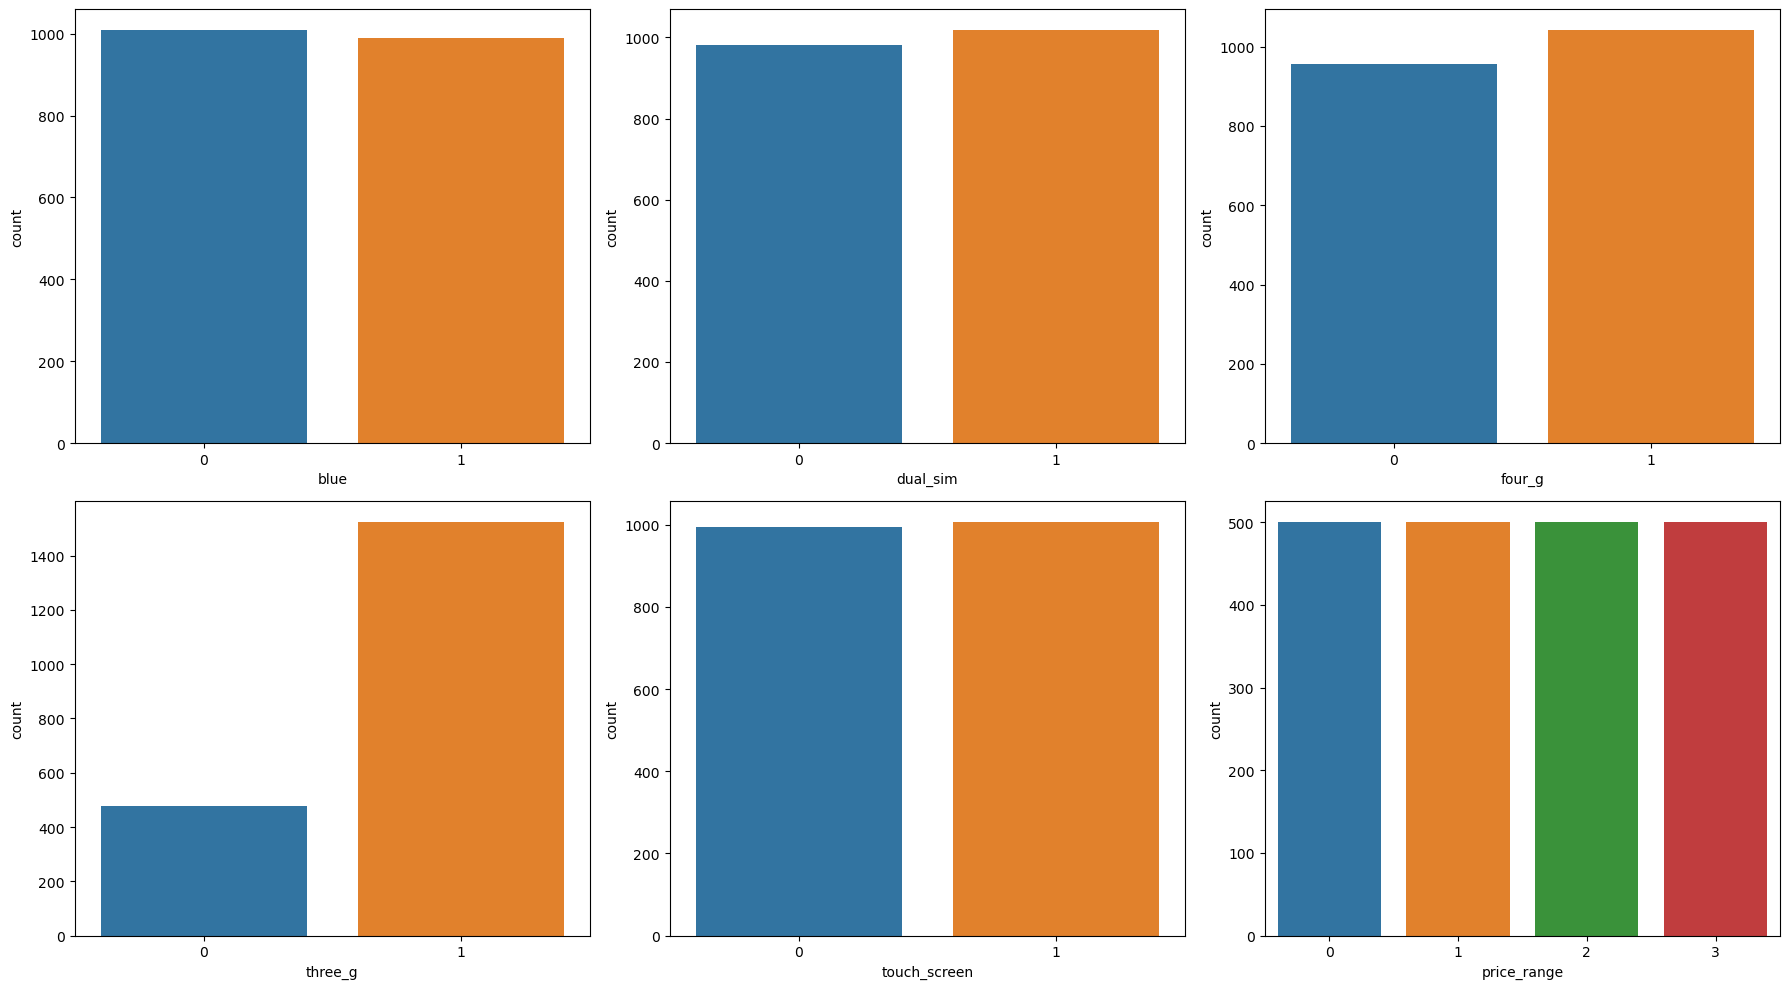

In [30]:
plt.figure(figsize=(18,10))
col = ['blue','dual_sim','four_g','three_g','touch_screen','price_range']
c = 1
for i in col:
    if c < 7:
        plt.subplot(2,3,c)
        sn.countplot(x = i,data =df)
        plt.xlabel(i)
    c += 1
    plt.savefig("cat.jpg", dpi=300)
    plt.tight_layout()


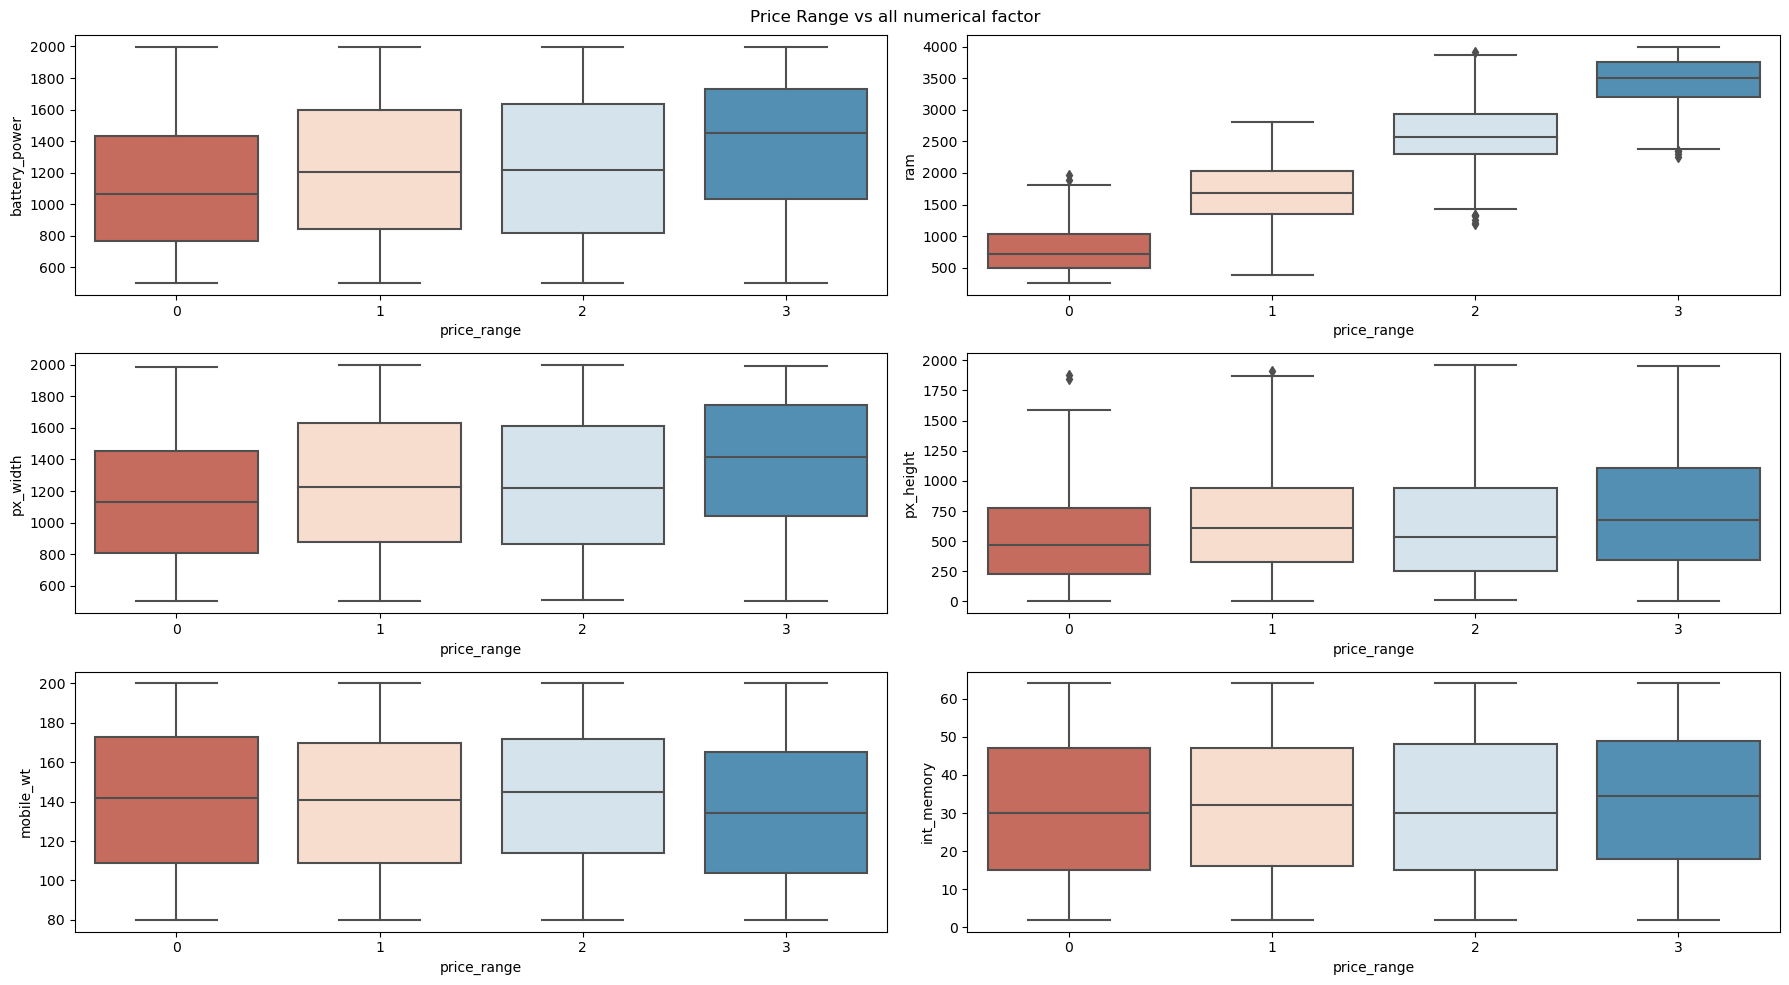

In [31]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical factor')

sn.boxplot(ax=axes[0, 0], data=df, x='price_range', y='battery_power',palette = "RdBu")
sn.boxplot(ax=axes[0, 1], data=df, x='price_range', y='ram',palette = "RdBu")
sn.boxplot(ax=axes[1, 0], data=df, x='price_range', y='px_width',palette = "RdBu")
sn.boxplot(ax=axes[1, 1], data=df, x='price_range', y='px_height',palette = "RdBu")
sn.boxplot(ax=axes[2,0],data=df,x='price_range',y='mobile_wt',palette = "RdBu")
sn.boxplot(ax=axes[2,1],data=df,x='price_range',y='int_memory',palette = "RdBu")
plt.tight_layout()
plt.savefig("num.jpg", dpi=300)
plt.show()


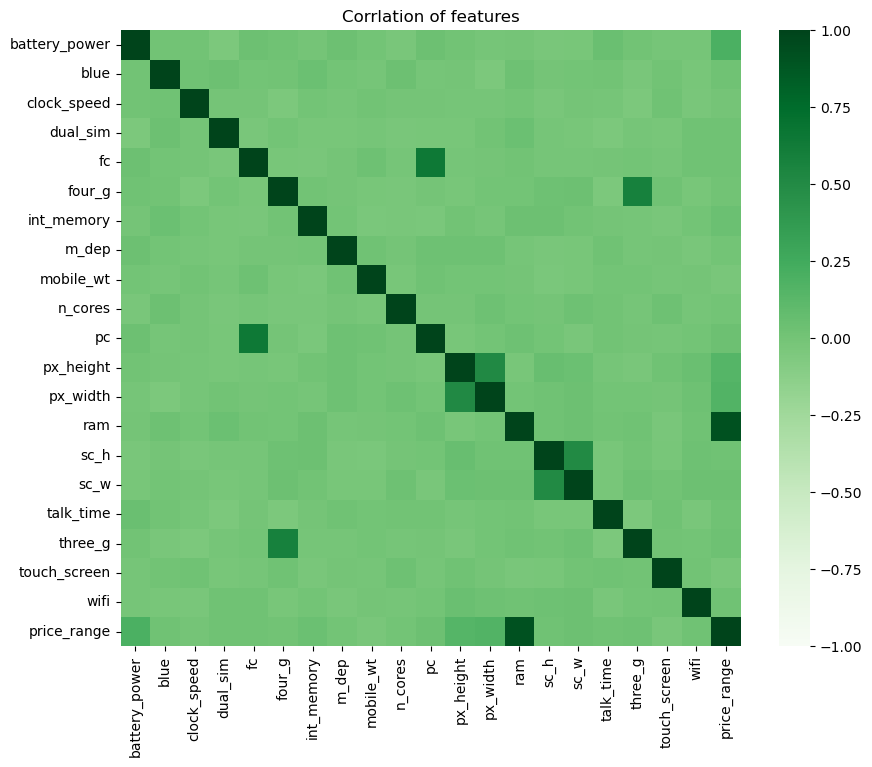

In [47]:
corr_cols_order = df.corr()['price_range'].sort_values(ascending=False).index
corr_cols_order
plt.figure(figsize=(10, 8))
heatmap_corr = sn.heatmap(corr, cmap = 'Greens', vmax=1, vmin =-1)
heatmap_corr.set(title='Corrlation of features')
plt.savefig("corr.jpg", dpi=300)
plt.show()


In [48]:
#Categorical vs. categorical columns
#stacked bar plot
count_matrix = df.groupby(['price_range', 'dual_sim']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

dual_sim         0      1
price_range              
0            0.500  0.500
1            0.490  0.510
2            0.502  0.498
3            0.470  0.530


<Figure size 500x300 with 0 Axes>

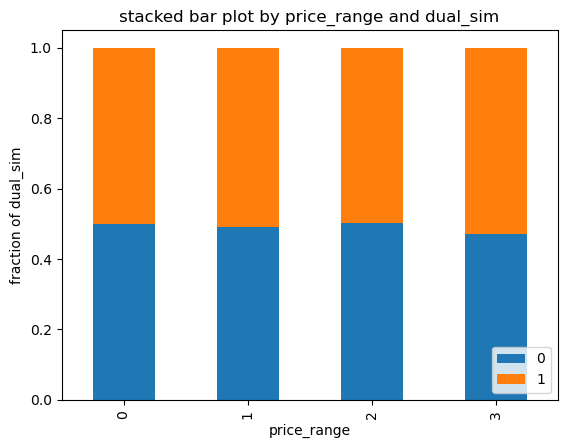

In [49]:
plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of dual_sim')
plt.legend(loc=4)
plt.title('stacked bar plot by price_range and dual_sim')
plt.savefig("dual_sim_price.jpg", dpi=300)
plt.show()

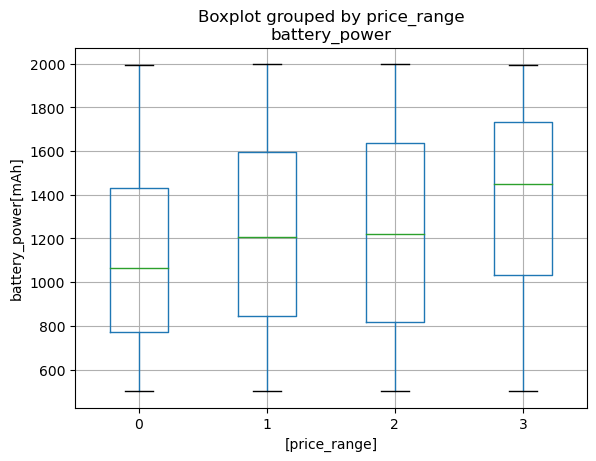

In [18]:
#Continuous vs. categorical columns
#box plot

df[['battery_power','price_range']].boxplot(by='price_range')
plt.ylabel('battery_power[mAh]')
plt.savefig("boxplot_battery_VS_price.jpg", dpi=300)
plt.show()

large battery power lead the price range increasing

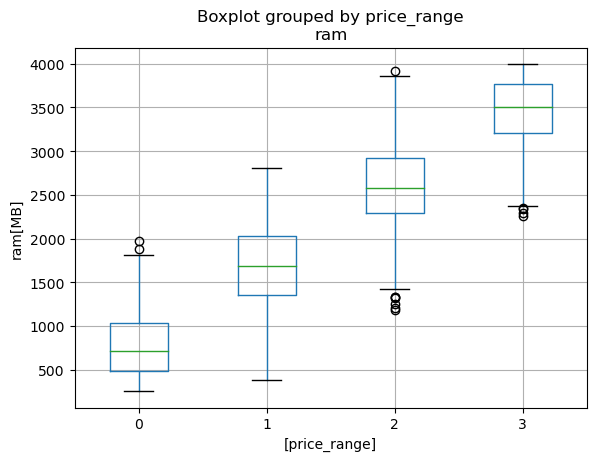

In [19]:
#Continuous vs. categorical columns
#box plot

df[['ram','price_range']].boxplot(by='price_range')
plt.ylabel('ram[MB]')
plt.savefig("ram_VS_price.jpg", dpi=300)
plt.show()

Low priced mobile can be less weighted because it doesn't have as many equipment as a expensive mobile does such as Large bettery, cameras.
But, compartively thick mobile has lower price and very thin mobile is much expensive, that is why we see price range 3 with low mobile weight

<AxesSubplot:>

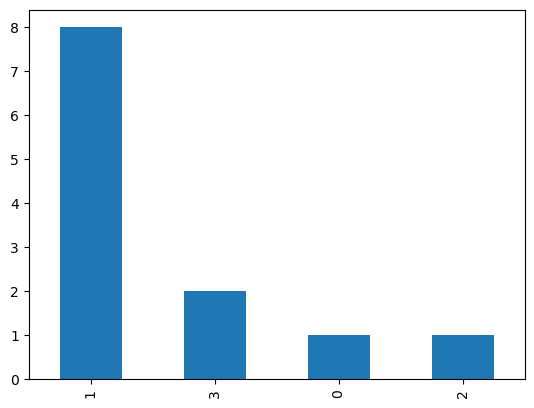

In [20]:
df[(df['int_memory'] >= 32)&(df['touch_screen'] == 1)&(df['pc'] >= 20)&\
   (df['battery_power'] >= 1200)]['price_range'].value_counts().plot.bar()

Expensive mobile doesn't mean every good features contain in it. Now a days maximum mobiles are cost effective and have so many facilities.

In [21]:
# balance data
y = df['price_range']
print(y.value_counts())

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


# 2. Split the data into different sets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('price_range',axis=1)
y = df['price_range']

In [24]:
random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,\
                    train_size = 0.6,random_state = random_state)
print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
print(X_other.shape, y_other.shape) # 40% of points are in other

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,\
                    train_size = 0.5,random_state = random_state)
print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

print(X_train.head())
print(y_train.head())

training set: (1200, 20) (1200,)
(800, 20) (800,)
validation set: (400, 20) (400,)
test set: (400, 20) (400,)
      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
798            1800     1          0.7         0   2       1           8   
1102            514     1          0.7         0   4       0          57   
105             832     0          0.7         1   2       1          39   
126             826     1          2.4         1   0       1          58   
1995            794     1          0.5         1   0       1           2   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
798     0.4        100        7   6        400       823  3481    10     8   
1102    0.1        186        3   7        168      1320   687     6     0   
105     0.7        103        4   3        125      1504  1799     5     2   
126     0.3         88        4   1        179       786  2863     9     3   
1995    0.8        106        6  14       1

In [26]:
from sklearn.model_selection import KFold

In [27]:
random_state =42

# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
print(X_other.shape,y_other.shape)
print('test set:',X_test.shape,y_test.shape)

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) 
    # the validation set contains different points in each iteration
    print(X_val[['battery_power','blue','clock_speed']].head())
    

(1600, 20) (1600,)
test set: (400, 20) (400,)
   training set: (1280, 20) (1280,)
   validation set: (320, 20) (320,)
      battery_power  blue  clock_speed
1407           1617     0          1.5
593            1395     1          2.8
1326            769     1          1.2
426            1190     1          2.2
1293           1702     0          1.0
   training set: (1280, 20) (1280,)
   validation set: (320, 20) (320,)
      battery_power  blue  clock_speed
588            1966     1          1.4
1761           1329     1          1.7
198             609     0          0.5
1558            769     0          0.5
192            1490     1          0.5
   training set: (1280, 20) (1280,)
   validation set: (320, 20) (320,)
      battery_power  blue  clock_speed
968            1923     0          0.5
819            1236     0          0.9
692             781     0          1.1
1085           1741     1          0.5
1998           1512     0          0.9
   training set: (1280, 20) (1280,)


# 3. Preprocess the data

In [57]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [58]:
print(df['mobile_wt'].value_counts())

182    28
101    27
185    27
146    26
199    26
       ..
116    10
140     9
120     9
149     9
96      9
Name: mobile_wt, Length: 121, dtype: int64


In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [60]:
# collect the various features
ordinal_ftrs = ['fc','n_cores','pc','sc_h','sc_w','talk_time']
ordinal_cats = [['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'],\
                ['1','2','3','4','5','6','7','8'],\
                ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'],\
                ['5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'],\
                ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'],\
                ['2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'],\
                ]

num_ftrs = ['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_width','ram']
cat_ftrs = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']


preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), cat_ftrs),
        ('std', StandardScaler(), num_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)


print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(1200, 20)
(1200, 26)
[[ 2.00000000e+00  6.00000000e+00  6.00000000e+00 ... -5.45507060e-01
  -9.85259128e-01  1.26264432e+00]
 [ 4.00000000e+00  2.00000000e+00  7.00000000e+00 ... -1.07152464e+00
   1.66620871e-01 -1.32930777e+00]
 [ 2.00000000e+00  3.00000000e+00  3.00000000e+00 ... -1.16901928e+00
   5.93071414e-01 -2.97721970e-01]
 ...
 [ 0.00000000e+00  4.00000000e+00  7.00000000e+00 ...  2.00440284e-01
   4.37845734e-02 -3.70424649e-02]
 [ 3.00000000e+00  7.00000000e+00  1.20000000e+01 ... -3.39181199e-01
   5.97706746e-01  7.38502255e-01]
 [ 1.00000000e+00  4.00000000e+00  1.30000000e+01 ... -1.01484171e+00
  -6.00526573e-01 -1.19949680e-02]]


In [61]:
from sklearn.impute import SimpleImputer
ordinal_ftrs = ['fc','n_cores','pc','sc_h','sc_w','talk_time']
ordinal_cats = [['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'],\
                ['1','2','3','4','5','6','7','8'],\
                ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'],\
                ['5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'],\
                ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'],\
                ['2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'],\
                ]

num_ftrs = ['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_width','ram']
cat_ftrs = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']

random_state = 42

# one-hot encoder
# We need to replace the NaN with a string first!
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# ordinal encoder
# We need to replace the NaN with a string first!
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [62]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# the feature names after fit
feature_names = preprocessor.get_feature_names_out()

# you can convert the numpy array back to a data frame with the feature names if you want
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = feature_names)
print(df_val.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

(1200, 26)
(400, 26)
(400, 26)
['num__battery_power' 'num__clock_speed' 'num__int_memory' 'num__m_dep'
 'num__mobile_wt' 'num__px_height' 'num__px_width' 'num__ram'
 'cat__blue_0' 'cat__blue_1' 'cat__dual_sim_0' 'cat__dual_sim_1'
 'cat__four_g_0' 'cat__four_g_1' 'cat__three_g_0' 'cat__three_g_1'
 'cat__touch_screen_0' 'cat__touch_screen_1' 'cat__wifi_0' 'cat__wifi_1'
 'ord__fc' 'ord__n_cores' 'ord__pc' 'ord__sc_h' 'ord__sc_w'
 'ord__talk_time']
